<a href="https://colab.research.google.com/github/maurohrosa/projetos_data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Viena_%C3%81ustria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by Mauro Rosa*

---

# Análise dos Dados do Airbnb - *Viena, Áustria*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Viena-Áustria, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Viena, *um pouco sobre sua história*

Viena, a capital da Áustria, fica no leste do país, às margens do rio Danúbio. Seu legado artístico e intelectual se consolidou com as obras de figuras como Mozart, Beethoven e Sigmund Freud, que nela viveram. A cidade também é conhecida por seus palácios imperiais, como Schönbrunn, a casa de veraneio da família Habsburgo. No distrito MuseumsQuartier, há construções históricas e contemporâneas que expõem obras de Egon Schiele, Gustav Klimt e outros artistas. ― Google

<center><img alt="Viena" width="70%" src=https://img.travelawaits.com/filter:centercrop/quill/e/7/a/4/3/0/e7a4306c352308d7595c6798af5651233b63a5b8.jpg?w=800&h=800></center>

## Obtenção dos Dados


*Nesta etapa vamos importar as principais pacotes, bem como o Dataset*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/austria/vienna/vienna/2021-02-10/visualisations/listings.csv')

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,87,1,11,2020-02-19,0.15,4,365
1,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,55,3,324,2020-10-10,2.69,3,169
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,134,1,155,2020-08-18,1.21,15,328


## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

**Vamos explorar nosso Dataset**, *identificando e visualizando nossas variáveis, dados de entrada.*

In [4]:
print('Entradas (linhas):\t{}'.format(df.shape[0]))
print('Variáveis (colunas):\t{}'.format(df.shape[1]))
display(df.dtypes)

Entradas (linhas):	11496
Variáveis (colunas):	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Temos dados ausentes em nosso Dataset?** 

<img alt="Viena" width="30%" src=https://hackinganalytics.files.wordpress.com/2016/09/missing.jpg>

Está informação é muito importante na análises exploratória, e muitas vezes norteiam o caminho que se deve percorrer.
Muitos modelos de **machine learning** não funcionam bem com dados ausentes (pelo menos os que conheço).
Temos diveras formas de tratativas para os casos de features com dados ausentes, podemos:
- Ignora-las e simplesmente excluir de nossa análise, muitas vezes não é o mais recomendável, mas pode ser uma saída, se tiver absoluta certeza disso. Normalmente a quantidade de dados faltantes (% do todo) nos auxiliam nesta decisão.
- Podemos preenche-los (com média, mediana, valores acima, abaixo etc.) e o pacote `pandas`diga-se de passagem é muito bom para isso.
- Como tambem podemos criar uma nova variável (feature) com esta informação de dados ausentes.

Enfim, como já ouvi falar muito por ai, use e abuse de sua criatividade. 

In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

neighbourhood_group               1.000000
reviews_per_month                 0.194068
last_review                       0.194068
name                              0.001218
host_name                         0.000261
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

*Poderiamos analisar de forma gráfica tambem:*

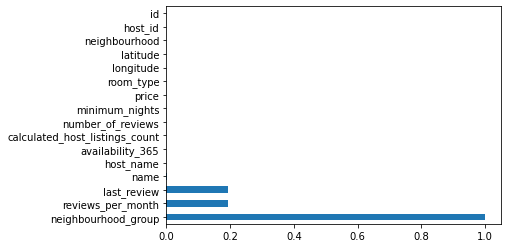

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False).plot(kind='barh');

* A coluna `neighbourhood_group` possui 100% dos seus registros vazios. Como mencionei acima, recomendei algumas tratativas para estes casos. Neste, especificamente, identifiquei que não ira interferir significativamente em nossa analise, (não iremos aplicar nenhum modelo de ML a principio) poderiamos excluir está variável sem grandes problemas.

* As colunas `reviews_per_month` e `last_review` possuem respectivamente 19,4% de dados nulos, vamos identifica-los mais adiante e ver sua relevância e tratativa, caso necessário. 

**Uma forma rapida e eficaz de começar a analisar os dados, é identificar sua distribuição nas variáveis (`features`), e o *`histograma`* é o cara ideal para isso.**

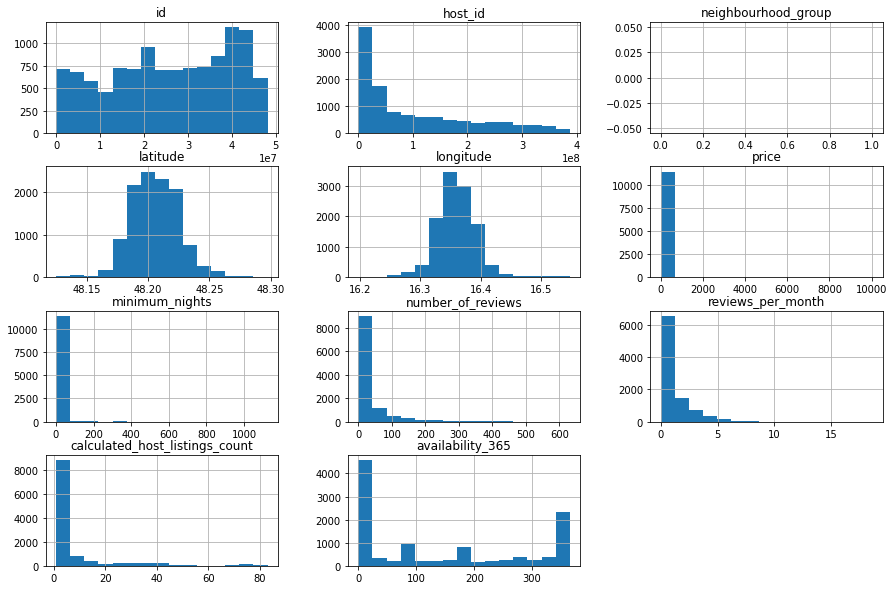

In [7]:
df.hist(bins=15, figsize=(15,10)); # ; para remover o cabeçalho do matplotlib

**Vamos começar a por a mão na massa.**
*Vou listar as variáveis que acredito serem as mais relevantes e usaremos o método `Describe()`.*

Dica importante: Todos os métodos em python são seguidos de ( ), enquanto os atributos não. ex: shape, columns

In [8]:
# Usando o describe
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11496.000000,11496.000000,11496.000000,9265.000000,11496.000000,11496.000000
mean,86.123086,5.544624,31.760003,1.064234,7.697634,142.083855
std,343.413346,24.200498,59.878609,1.334324,15.008361,145.616385
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,55.000000,2.000000,7.000000,0.500000,2.000000,90.000000
75%,80.000000,3.000000,34.000000,1.460000,5.000000,301.000000
max,10020.000000,1125.000000,631.000000,18.560000,83.000000,365.000000


Pelo Describe já conseguimos identificar alguns `outliers`, temos preços (price) exorbitantes, muito acima da média e std (desvio padrão), minimum_nights tambem, já conseguimos ter um norte sobre as informações de nosso Dataset.

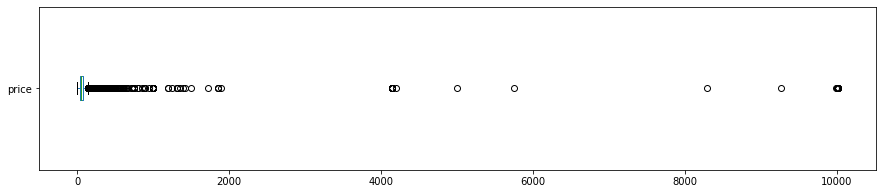

In [9]:
df.price.plot(kind='box', figsize = (15,3), vert=False);

In [10]:
#78% de nossos dados estão com price abaixo da média
avgprice = df.price.mean()
len(df[df['price']< avgprice])/df.shape[0]

0.7829679888656924

* Se pegarmos um teto, no caso **500** de price, vemos que os valores acima do teto representariam uma parcela pequena do dataset, neste caso vamos trabalhar com valores ate 500, e removendo os demais considerando-os como `outliers`.

In [11]:
print("\nprice: valores abaixo de 500")
print("{} entradas".format(len(df[df.price < 500])))
print("{:.2f}%".format((len(df[df.price < 500]) / df.shape[0])*100))


price: valores abaixo de 500
11391 entradas
99.09%


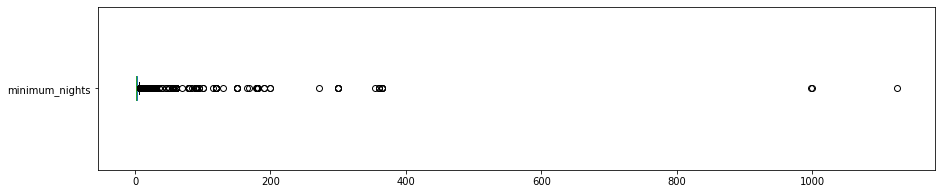

In [12]:
df.minimum_nights.plot(kind='box', figsize = (15,3), vert=False);

In [13]:
len(df[df['minimum_nights']< 50])/df.shape[0]

0.9862560890744607

*Vamos criar um novo Dataframe, com valores de `price`menor que 500 e `minimum_nights`abaixo de 50*

In [14]:
df_clean = df.copy()

In [15]:
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 50].index, axis=0, inplace=True)

In [16]:
#Vamos aproveitar tambem e remover a coluna `neighbourhood_group`
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

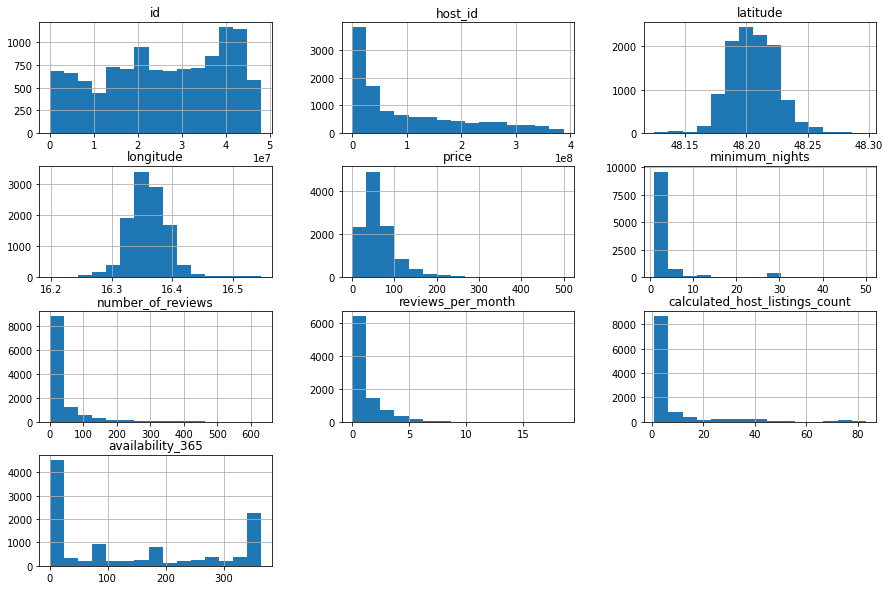

In [17]:
df_clean.hist(bins=15, figsize=(15,10));

*Vamos identificar a correlação das variáveis.
Note que apenas as variáveis `number_of_reviews` e `number_of_reviews` possuem uma correlação proximo a 1 (**`forte positiva`**), as demais ficar mais proximas a 0, sem correlação entre elas.*   

In [18]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.052273,-0.034705,-0.062590,0.102939,0.171720
minimum_nights,-0.052273,1.000000,-0.086251,-0.129751,-0.012999,0.061437
number_of_reviews,-0.034705,-0.086251,1.000000,0.792706,-0.043598,0.141705
reviews_per_month,-0.062590,-0.129751,0.792706,1.000000,0.009927,0.142221
calculated_host_listings_count,0.102939,-0.012999,-0.043598,0.009927,1.000000,0.207870
availability_365,0.171720,0.061437,0.141705,0.142221,0.207870,1.000000


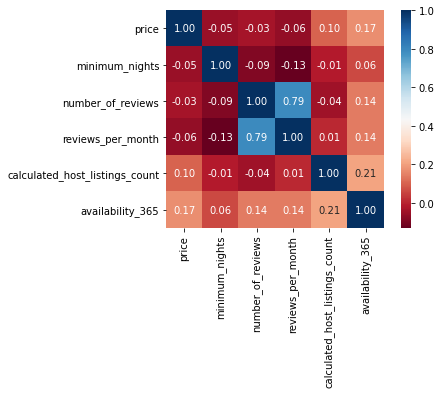

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Agora vamos a parte que mais nos interessa, como turistas ou curiosos mesmo.**

*Qual o tipo de imóvel disponível? O tipo de imóvel influência no número de reviews, reviews por mês?* 

Entire home/apt    8429
Private room       2878
Hotel room           96
Shared room          93
Name: room_type, dtype: int64

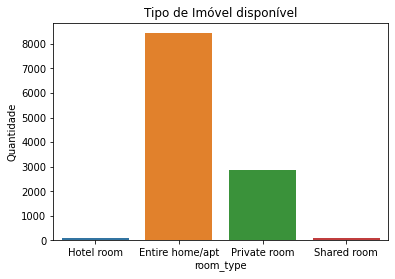

In [20]:
sns.countplot(x= df.room_type, data= df)
plt.title('Tipo de Imóvel disponível')
plt.ylabel('Quantidade')

df.room_type.value_counts()


In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(df.room_type.value_counts() / df.shape[0]*100)

Entire home/apt    73.321155
Private room       25.034795
Hotel room          0.835073
Shared room         0.808977
Name: room_type, dtype: float64


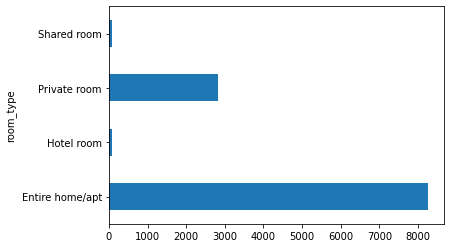

In [22]:
df_clean.groupby('room_type')['number_of_reviews'].count().plot(kind='barh');

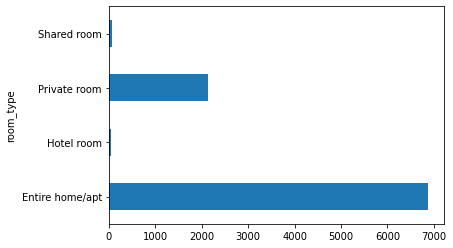

In [23]:
df_clean.groupby('room_type')['reviews_per_month'].count().plot(kind='barh');

*Podemos notar que os tipos de imóveis disponíveis tambem são os que mais recebem `reviews`, mesmo sendo a maioria em quantidade, reforça a alta procura/gosto dos clientes por este tipo de imóvel*

*Uma outra caracteristica de imóvel que **pesa** na tomada de decisão e a localidade X preço do imóvel disponível, vamos analisar este tema*

In [24]:
#Vamos trazer os 10 bairros mais caros (média)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Innere Stadt    125.835726
Wieden           79.668737
Dbling          76.708812
Simmering        72.417391
Mariahilf        71.379817
Landstra§e       69.597561
Liesing          69.076923
Neubau           68.415014
Donaustadt       67.437500
Josefstadt       66.530769
Name: price, dtype: float64

Ok, mas não pretendemos ficar nos lugares mais caros, pelo menos eu. Uma forma de filtrar isso é escolhendo o tipo de imóvel, como vimos acima temos maior apelo por `Entire home/apt`

In [25]:
df_clean[(df_clean['room_type'] == 'Entire home/apt')].groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Innere Stadt    123.227273
Wieden           91.563187
Simmering        88.975000
Dbling          86.316384
Josefstadt       82.991903
Mariahilf        82.195373
Landstra§e       78.342896
Alsergrund       78.256167
Neubau           77.727473
Donaustadt       74.860000
Name: price, dtype: float64

In [26]:
df_clean[(df_clean['room_type'] == 'Private room')].groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Innere Stadt    127.396226
Dbling          58.717949
Liesing          56.772727
Neubau           45.760870
Mariahilf        43.660000
Wieden           41.853448
Meidling         41.627907
Floridsdorf      41.533333
Whring          40.826087
Landstra§e       40.758772
Name: price, dtype: float64

Fazendo uma pesquisa rapída pelo Google, temos os melhores bairros para se ficar hospedado em Viena, olhe que interessante, 3 se encontram em nossa lista.
* Innere Stadt.
* Wieden.
* Mariahilf.

A titulo de curiosidade, o dataset nos fornece informações de latitude e longitude, onde podemos plotar um gráfico de dispersão e visualizar sua relação com o preço (`price`), os pontos em **vermelho**, são os imóveis com os valores mais caros, que já identificamos nas análises acima.

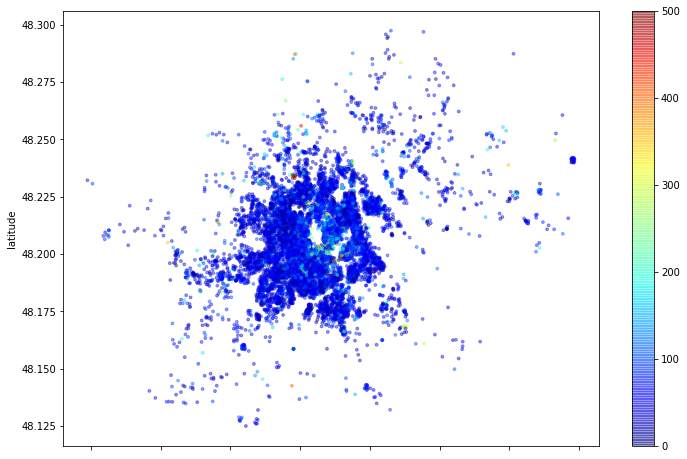

In [27]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


*Vamos rodar o mesmo gráfico, porém pegando os 3 bairros que coincidiram com a pesquisa do* **Google**.

In [28]:
filter2 = df_clean['neighbourhood'].isin(['Innere Stadt', 'Wieden', 'Mariahilf'])
df_bairros = df_clean[filter2]

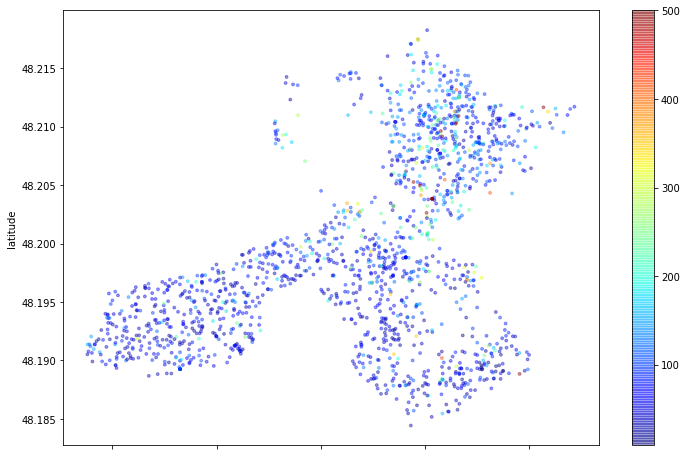

In [29]:
df_bairros.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_bairros['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

*Podemo visualizar tambem por um mapa, atraves do folium, uma lib bem interessante*

In [30]:
import folium

In [31]:
latitude= df_bairros['latitude']
longitude= df_bairros['longitude']

In [32]:
mapa = folium.Map(location=[48.2203445,16.09988], zoom_start=9.70, width='50%', height='50%')

for lat, lon in zip(latitude, longitude):
  folium.Marker(location=[float(lat), float(lon)]).add_to(mapa)

In [33]:
#Esta um pouco lento, mas funcionou, recomendo rodar o código
mapa

*OK, já identificamos os bairros, valores médios, tipo de imóvel disponível. Agora, quantos dias em média (noites) de aluguel? O que está informação pode nos ajudar? Vamos investigar.*

In [34]:
bairros = df_bairros.neighbourhood.unique()
bairros

array(['Wieden', 'Mariahilf', 'Innere Stadt'], dtype=object)

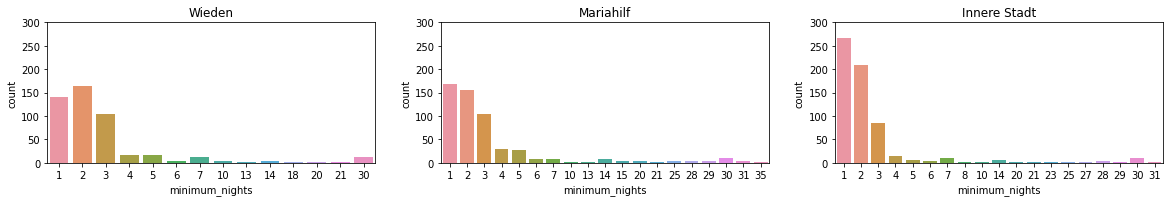

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(5, 3, 1)
plot = sns.countplot(x=df_bairros[(df_bairros['neighbourhood'] == 'Wieden')].minimum_nights, data= df_bairros)
plt.title('Wieden')
plt.ylim(0,300)

plt.subplot(5, 3, 2)
plot = sns.countplot(x=df_bairros[(df_bairros['neighbourhood'] == 'Mariahilf')].minimum_nights, data= df_bairros)
plt.title('Mariahilf')
plt.ylim(0,300)

plt.subplot(5, 3, 3)
plot = sns.countplot(x=df_bairros[(df_bairros['neighbourhood'] == 'Innere Stadt')].minimum_nights, data= df_bairros)
plt.title('Innere Stadt')
plt.ylim(0,300);

*Podemos observar que até 3 dias costuma ser o ideal para estadia, com uma mescla entre os bairros.* 
- Weiden mais concentrado em 2 dias;
- Mariahilf com 1 e 2 bem próximos;
- Innere Stadt com uma escada entre 1 e 3.


## Conclusões


Fizemos uma analise simples, em um Dataset resumido do Airbnb.
Trouxemos provocações e formas de analise atraves das principais bibliotecas de Python, que poderão ser usadas em todo e qualquer estudo.
Conseguimos identificar o tipo de imóvel mais disponível para locação, bairro mais recomendado, seja pela média de preço, pelo número de reviews ou até mesmo um double check com a pesquisa do Google..rsrs 
E por fim, o minimo de noites que que mais eram alugados em cada um deles.
Tudo isso em cima de um Dataset resumido, já conseguimos ter uma dimensão do poder do Python para analise de Dados.